# Chapter 3 Markov Dynamics Reading Note

Three subsections:

1. Foundations: Markov chains, stationarity and ergodicity, approximation
2. Conditional Expectations: mathematical expectations, geometric sums
3. Job search revisited: Job search with Markov state, Job search with separation.

## Definitions

**Definition (Markov chain on State Space X)**

Let $(X_t):= (X_t)_{t\ge 0}$ be a sequence of random variables taking values in $X$ and call $(X_t)$ a **Markov chain on state space $X$** if there exists a $P\in\mathscr{M}(\mathbb{R}^X)$ such that

$$
\mathbb{P}\{X_{t+1} = x'|X_0,X_1,\cdots,X_t\}=P(X_t,x') \,\,\,\forall t\ge 0, x'\in X \tag{P-Markov}
$$

**Definition (P-Markov)**

We call $(X_t)$ a $P$-Markov when the above condition holds.


**Definition (initial distribution)**

We call $X_0$ or its distribution $\psi_0$ the **initial condition** of $(X_t)$ depending on the context.

**Definition (transition matrix)**

$P$ is also called the **transition matrix** of the Markov chain.

## Markov Chains

The definition of a Markov chain says two things:

1. When updating to $X_{t+1}$ from $X_t$, **earlier states are not required**.

2. $P$ **encodes all of the information required to perform the update**, given the current state $X_t$.

### Think about Markov chain in algorithmic way

Fix $P\in\mathscr{M}(\mathbb{R}^X)$ and let $\psi_0$ be an element of $\mathcal{D}(X)$. 

Now generate $(X_t)$ using the following algorithm, the resulting sequence is $P$-Markov with inital distribution $\psi_0$.

**Algorithm: Generate of $P$-Markov $(X_t)$ with initial condition $\psi_0$**

$t\gets 0$

$X_t\gets$ a draw from $\psi_0$

**while** $t<\infty$ **do**

$X_{t+1}\gets$ a draw from the distribution $P(X_t, \cdot)$
    
$t\gets t+1$

**end**


### Application: S-s dynamics

Consider a firm whose inventory of some products follows a $S-s$ dynamics, meaning that the firm waits until its inventory falls below some level $s>0$ and then immediately replenishes by ordering $S$ units.

This pattern of decisions can be rationalized if **ordering requires paying a fixed cost**. The $S-s$ behavior is optimal in **a setting where fixed costs exists and the firm's aim is to maximize its present value**.

To represent $S-s$ dynamics, we suppose that a firm's inventory $(X_t)_{t\ge 0}$ of a given product obeys,

$$
X_{t+1} = \max\{X_t-D_{t+1},0\} + S\mathbb{1}\{X_t\le s\}
$$

where

- $(D_t)_{t\ge 1}$ is an exogenous IID demand process with $D_t=_d\varphi\in\mathcal{D}(\mathbb{Z}_+)$ for all $t$

- $S$ is the quantity ordered when $X_t\le s$.

- The distribution $\varphi$ of demand, we take geometric distribution, so that 

$$
\varphi(d) = \mathbb{P}\{D_t=d\} = p(1-p)^d,\,\,d\in\mathbb{Z}_+
$$

If we define $h(x,d):= \max\{x-d,0\}+S\mathbb{1}\{x\le s\}$, so that $X_{t+1} = h(X_t,D_{t+1})$ for all $t$, then the transition matrix can be expressed as

$$
P(x,x') = \mathbb{P}\{h(x,D_{t+1})=x'\} = \sum_{d\ge 0}\mathbb{1}\{h(x,d)=x'\}\varphi(d)
$$

for all $(x,x')\in X\times X$

Now we create a code to simulate this model.

First, let's create a namedtuple to store the model values.

In [15]:
import numpy as np
from collections import namedtuple
import quantecon as qe
from scipy.stats import geom
import matplotlib.pyplot as plt

In [7]:
Inventory_model = namedtuple ("Inventory",("S",         # Order Size S
                                           "s",         # Reorder threshold
                                           "p",         # Geometric distribution parameter
                                           "ts_length", # Length of simulation
                                           "seed",      # seed for geometric distribution
                                           "D"          # Demand sequence
                                          ))

# Create a model with parameter values

def create_inventory_model(S=100, s=10, p=0.4, ts_length=200, seed=1):
    D = geom.rvs(p, size=ts_length, random_state=seed)  # Generate random demand process under geometric distribution
    return Inventory_model(S=S,s=s,p=p, ts_length=ts_length, seed=seed, D=D)     

In [53]:
# Create a function to generate simulated inventory sequence
def simulate_inventory(inventory):
    S, s, p, ts_length, seed, D = inventory            # Unpack model parameters
    X = np.zeros(ts_length)                            # Initialize the Markov chain           
    X[1] = S                                           # Set initial conditions
    for t in range(1, ts_length-1):                    # Loop over time
        if X[t]<s:       
            X[t+1] = np.max(X[t]-D[t+1],0) + S         # Order S if below the threshold
        else:
            X[t+1] = np.max(X[t]-D[t+1])               # No order
    return X

def plot_inventory(inventory, X): 
    S, s, p, ts_length, seed, D = inventory            # Unpack model parameters
    fig, ax = plt.subplots()                           # inititalize the fig and ax
    ax.plot(range(0,ts_length), X)                     # plot the simulated sequence
    ax.set_xlabel('time')                              # x-label
    ax.set_ylabel('Inventory Stock')                   # y-label
    plt.show()                                         # display the plot

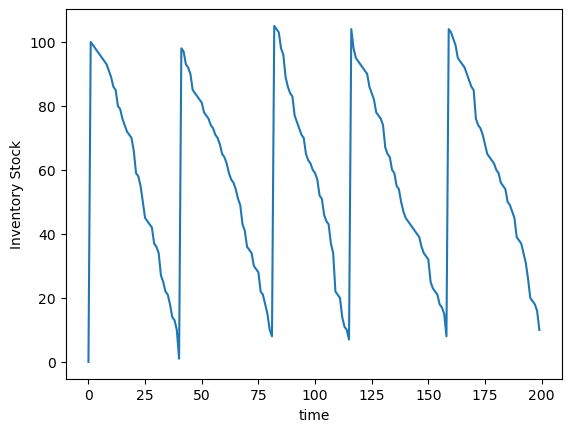

In [56]:
inventory = create_inventory_model()                   # Initialize the model
X = simulate_inventory(inventory)                      # obtain the simulated sequence X
plot_inventory(inventory, X)                           # Plot the simulated inventory stock